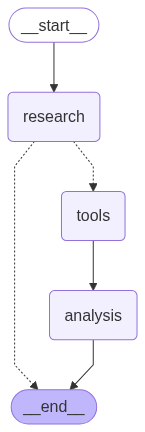

SyntaxError: keyword argument repeated: config (1757136698.py, line 60)

In [10]:
# Step 1: Zaroori libraries import karte hain
from langgraph.graph import StateGraph, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition, create_react_agent
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.checkpoint.memory import MemorySaver
from langchain.callbacks.tracers.langchain import LangChainTracer
tracer = LangChainTracer()

# Step 2: Tools define karte hain (yahan hum Tavily search ka tool le rahe hain)
search_tool = TavilySearchResults(max_results=2)  # 2 results tak hi

# Step 3: Apna LLM (Large Language Model) banate hain
llm = ChatOpenAI(model="gpt-4o-mini")  # entry-level ke liye chhota model

# Step 4: Pehla agent banate hain (Research Agent)
research_agent = create_react_agent(
    llm,
    tools=[search_tool],
    state_modifier="Tum Research Agent ho. Tumhara kaam search tool ka use karke information lana hai."
)

# Step 5: Dusra agent banate hain (Analysis Agent)
analysis_agent = create_react_agent(
    llm,
    tools=[],
    state_modifier="Tum Analysis Agent ho. Tumhara kaam Research Agent ki information ko summarize karna hai."
)

# Step 6: Graph banate hain
graph = StateGraph(MessagesState)

# Step 7: Memory add karte hain (taake agents baatein yaad rakhen)
memory = MemorySaver()

# Step 8: Graph me nodes (agents) add karte hain
graph.add_node("research", research_agent)
graph.add_node("analysis", analysis_agent)
graph.add_node("tools", ToolNode([search_tool]))

# Step 9: Nodes ke beech connections banate hain
graph.set_entry_point("research")
graph.add_conditional_edges("research", tools_condition)
graph.add_edge("tools", "analysis")

# Step 10: Graph compile karte hain with memory
# ... tumhara upar wala code same rahega

# Step 10: Graph compile karte hain with memory
app = graph.compile(checkpointer=memory)

# ✅ Step 10.1: Graph ka diagram save karte hain
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

# Step 11: Graph run (invoke) karte hain
final_state = app.invoke(
    {"messages": [("user", "Mujhe AI ka latest trend batao")]}, 
    config={"configurable": {"thread_id": "bilal-thread-1"}},
     config={"callbacks": [tracer]}
)

# Step 12: Output print karte hain
print(final_state["messages"][-1].content)




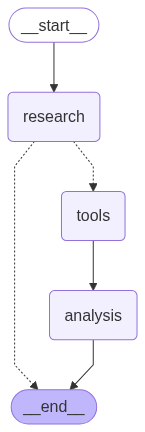


Final Response:
 AI ke kuch latest trends 2023 mein ye hain:

1. **Generative AI**: Is saal, generative AI ka istemal badh raha hai. Executives ka maanna hai ki ye productivity ko badhane mein madad karega aur 44% log naya AI technology ka istemal karne ki yojna bana rahe hain.

2. **ChatGPT ke naye versions**: OpenAI ne Chat GPT ka ek naya version launch kiya hai, jisme GPT-4 Turbo aur naye technologies shamil hain. 

3. **Mixture of Experts (MoE)**: Yeh ek naye AI model architecture ki taraf ja raha hai. Mistral AI ne 2023 mein apne Mixtral model ka release kiya, jiss ne industry ko naye AI models ki taraf dhyan dene par majboor kiya.

4. **Mamba Model**: Yeh ek naye tarike ka model hai jo transformers ko challenge kar raha hai aur language modeling ka kaam achhi tarah se kar raha hai.

5. **AI ka Market Growth**: Artificial intelligence ka global market 2030 tak USD 1345.2 billion tak pahunchne ka andaza hai, jo 36.8% CAGR ke saath badh raha hai.

In trends se ye pata chalta hai ki